# Pymaceuticals Inc.
---

### Analysis

- 


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = combined_df['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df[combined_df.duplicated()]
duplicates.values

array([['g989', 'Propriva', 'Female', 21, 26, 0, 45.0, 0]], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = combined_df[combined_df['Mouse ID'] == 'g989'].index
duplicate_id

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(duplicate_id[0:])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_df['Mouse ID'].nunique()
new_mice_count



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

stats_df = pd.DataFrame({'Mean Tumor Volume': drug_mean,
                        'Median Tumor Volume': drug_median,
                        'Tumor Volume Variance': drug_var,
                        'Tumor Volume Std. Dev.': drug_std,
                        'Tumor Volume Std. Err.': drug_sem})
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

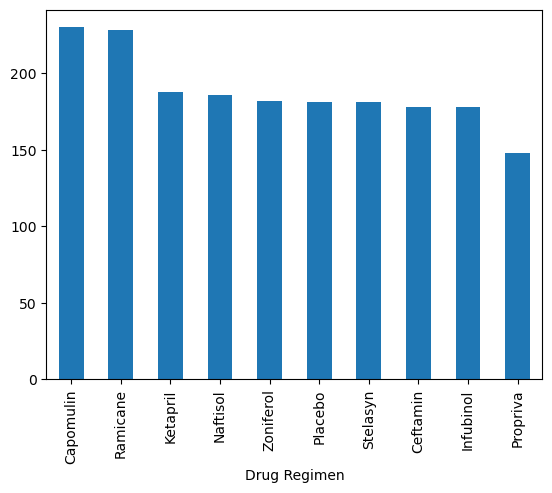

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
# for each drug regimen using Pandas.

count = clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

count.plot(kind='bar')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

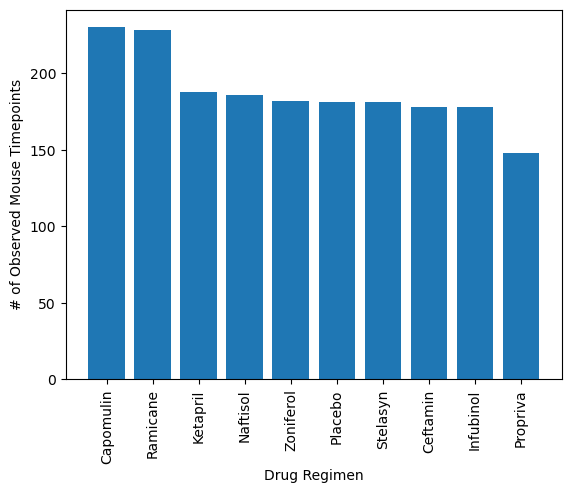

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints)
# for each drug regimen using pyplot.

plt.bar(count.index, count.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)


<Axes: ylabel='Mouse ID'>

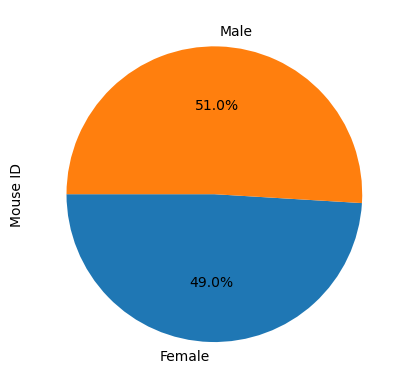

In [11]:
# Generate a pie plot showing the distribution of female
# versus male mice using Pandas

sex = clean_df.groupby('Sex')['Mouse ID'].count()

sex.plot(kind='pie',autopct='%.1f%%', startangle=180)

([<matplotlib.patches.Wedge at 0x27b78cc3fd0>,
 [Text(-0.0330820140826155, -1.0995024239828841, 'Female'),
  Text(0.03308201408261563, 1.0995024239828841, 'Male')],
 [Text(-0.018044734954153905, -0.5997285948997549, '49.0%'),
  Text(0.018044734954153978, 0.5997285948997549, '51.0%')])

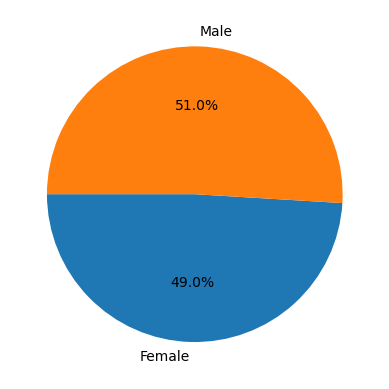

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
plt.pie(sex, labels=labels, autopct='%.1f%%', startangle=180)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID').last().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol = pd.merge(filtered_df, last_timepoint[['Mouse ID', 'Timepoint']], how='inner', on=['Mouse ID', 'Timepoint'])
tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = tumor_vol[tumor_vol['Drug Regimen'] == drug]['Tumor Volume (mm3)']
        
    # add subset 
    tumor_vol_data.append(drug_data)
    
    q1 = drug_data.quantile(0.25)

    q3 = drug_data.quantile(0.75)

    iqr = q3 - q1
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

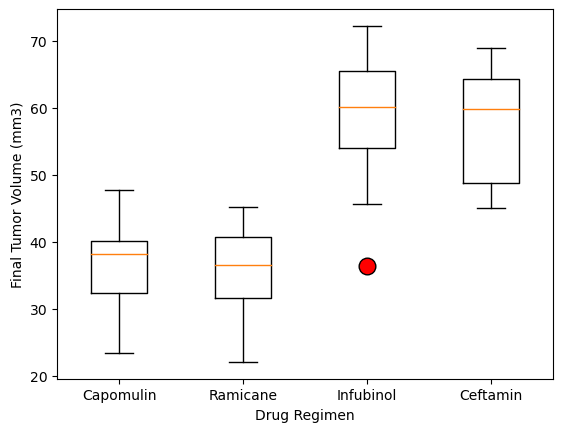

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
plt.boxplot(tumor_vol_data, labels=drug, flierprops={'marker': 'o', 
                                                     'markerfacecolor': 'red', 
                                                     'markersize': 12, 
                                                     'linestyle': 'none', 
                                                     'markeredgecolor': 'black'})
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

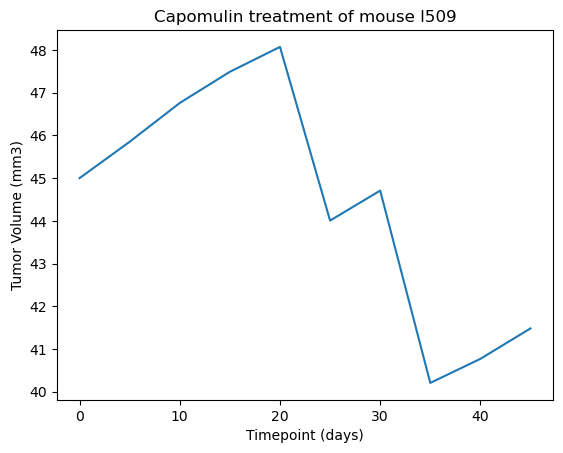

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = clean_df[clean_df['Mouse ID'] == 'l509']

plt.plot(l509['Timepoint'], l509['Tumor Volume (mm3)'])

plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

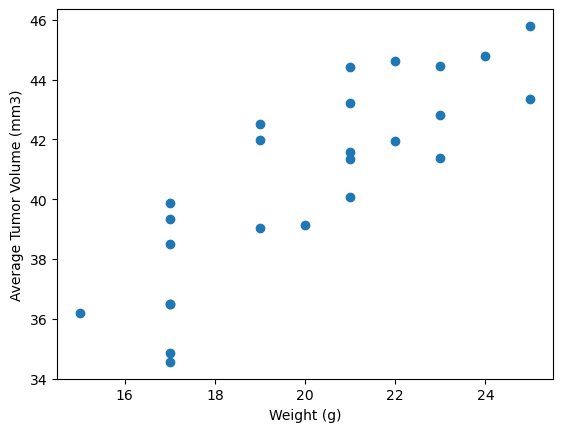

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_tumor_means = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

unique_weights = capomulin[['Mouse ID', 'Weight (g)']].drop_duplicates()

merged_capomulin = pd.merge(capomulin_tumor_means, unique_weights, on='Mouse ID', how='left')

plt.scatter(merged_capomulin['Weight (g)'], merged_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


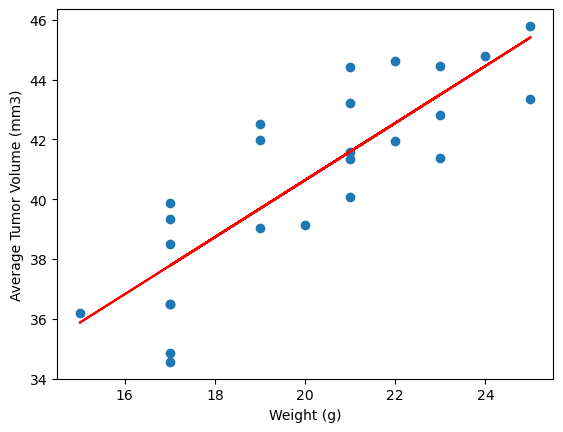

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st

weights = merged_capomulin['Weight (g)']
avg_tumor = merged_capomulin['Tumor Volume (mm3)']

correlation = st.pearsonr(weights, avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, avg_tumor)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weights, avg_tumor)
plt.plot(weights,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
